In [22]:
import numpy as np
import networkx as nx
import metis
from matplotlib import pyplot as plt

In [11]:
edges = [
    (33, 34, 1000),
    (1, 18, 1000),
    (1, 17, 1000),
    (17, 34, 1000),
    (48, 49, 1000),
    (18, 48, 1000),
    (25, 50, 1000),
    (49, 50, 1000),
    (24, 25, 1000),
    (3, 30, 1000),
    (3, 24, 1),
    (31, 32, 1000),
    (30, 31, 1000),
    (22, 32, 1000),
    (3, 47, 1000),
    (46, 47, 1000),
    (0, 20, 1000),
    (0, 4, 1000),
    (4, 29, 1000),
    (28, 29, 1000),
    (28, 46, 1000),
    (20, 21, 1000),
    (2, 21, 1000),
    (40, 42, 1000),
    (2, 40, 1000),
    (12, 41, 1000),
    (41, 42, 1000),
    (13, 14, 1000),
    (12, 13, 1000),
    (8, 16, 1000),
    (8, 14, 1000),
    (15, 16, 1000),
    (6, 7, 1000),
    (6, 15, 1000),
    (5, 6, 1000),
    (5, 9, 1000),
    (10, 11, 1000),
    (9, 10, 1000),
    (0, 19, 1000),
    (36, 44, 1000),
    (26, 36, 1000),
    (26, 27, 1000),
    (4, 27, 1000),
    (43, 45, 1000),
    (44, 45, 1000),
    (55, 56, 1000),
    (37, 55, 1000),
    (37, 38, 1000),
    (38, 43, 1000),
    (35, 56, 1000),
    (37, 39, 1000),
    (51, 52, 1000),
    (39, 52, 1000),
    (53, 54, 1000),
    (1, 53, 1000),
    (23, 54, 1000)
]
G = nx.Graph()
G.add_weighted_edges_from(edges)
G.nodes(), G.edges()

(NodeView((33, 34, 1, 18, 17, 48, 49, 25, 50, 24, 3, 30, 31, 32, 22, 47, 46, 0, 20, 4, 29, 28, 21, 2, 40, 42, 12, 41, 13, 14, 8, 16, 15, 6, 7, 5, 9, 10, 11, 19, 36, 44, 26, 27, 43, 45, 55, 56, 37, 38, 35, 39, 51, 52, 53, 54, 23)),
 EdgeView([(33, 34), (34, 17), (1, 18), (1, 17), (1, 53), (18, 48), (48, 49), (49, 50), (25, 50), (25, 24), (24, 3), (3, 30), (3, 47), (30, 31), (31, 32), (32, 22), (47, 46), (46, 28), (0, 20), (0, 4), (0, 19), (20, 21), (4, 29), (4, 27), (29, 28), (21, 2), (2, 40), (40, 42), (42, 41), (12, 41), (12, 13), (13, 14), (14, 8), (8, 16), (16, 15), (15, 6), (6, 7), (6, 5), (5, 9), (9, 10), (10, 11), (36, 44), (36, 26), (44, 45), (26, 27), (43, 45), (43, 38), (55, 56), (55, 37), (56, 35), (37, 38), (37, 39), (39, 52), (51, 52), (53, 54), (54, 23)]))

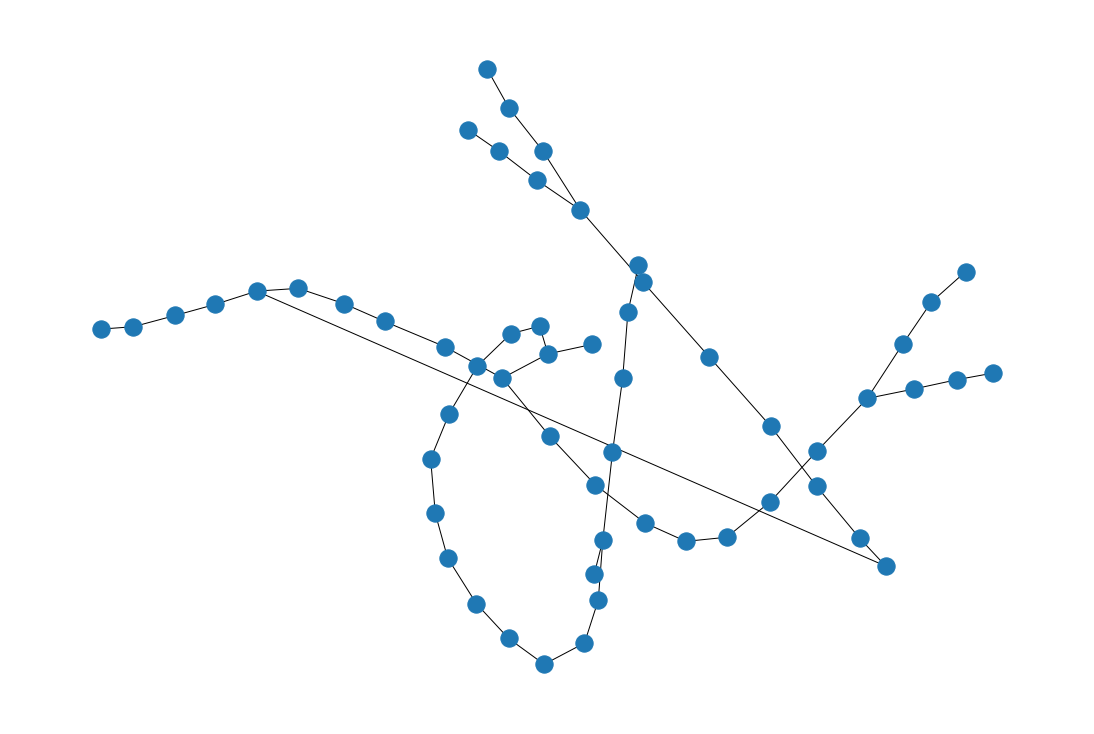

In [20]:
plt.figure(figsize=(15, 10))
nx.draw(G, pos=nx.spring_layout(G))
plt.draw()

In [82]:
G.graph['edge_weight_attr'] = 'weight'
all_nodes = np.array(G.nodes)
all_nodes

array([33, 34,  1, 18, 17, 48, 49, 25, 50, 24,  3, 30, 31, 32, 22, 47, 46,
        0, 20,  4, 29, 28, 21,  2, 40, 42, 12, 41, 13, 14,  8, 16, 15,  6,
        7,  5,  9, 10, 11, 19, 36, 44, 26, 27, 43, 45, 55, 56, 37, 38, 35,
       39, 51, 52, 53, 54, 23])

In [85]:
cutcost, parts = metis.part_graph(G, nparts=2, recursive=False)
parts = np.array(parts)
parts_nodes = list()
for part_index in np.unique(parts):
    nodes_indexes = np.where(parts == part_index)[0]
    parts_nodes.append(all_nodes[nodes_indexes])
part0, part1 = parts_nodes
print('Part 0', part0)
print('Part 1', part1)
tmp = 0
for u in part0:
    for v in part1:
        edge_data = G.get_edge_data(u, v)
        if edge_data is not None:
            tmp += edge_data['weight']
cutcost, tmp

Part 0 [33 34  1 18 17 48 49 25 50 24 40 42 12 41 13 14  8 16 15  6  7  5  9 10
 11 53 54 23]
Part 1 [ 3 30 31 32 22 47 46  0 20  4 29 28 21  2 19 36 44 26 27 43 45 55 56 37
 38 35 39 51 52]


(1001, 1001)

In [87]:
cutcost, parts = metis.part_graph(G, nparts=2, recursive=True)
parts = np.array(parts)
parts_nodes = list()
for part_index in np.unique(parts):
    nodes_indexes = np.where(parts == part_index)[0]
    parts_nodes.append(all_nodes[nodes_indexes])
part0, part1 = parts_nodes
print('Part 0', part0)
print('Part 1', part1)
tmp = 0
for u in part0:
    for v in part1:
        edge_data = G.get_edge_data(u, v)
        if edge_data is not None:
            tmp += edge_data['weight']
cutcost, tmp

Part 0 [ 3 30 31 32 22 47 46  0 20  4 29 28 21  2 40 42 12 41 13 14  8 16 15  6
  7  5  9 10 11 19]
Part 1 [33 34  1 18 17 48 49 25 50 24 36 44 26 27 43 45 55 56 37 38 35 39 51 52
 53 54 23]


(1001, 1001)